**Question 2: Imagine you have a dataset where you have different features like Age, Gender, Height, Weight, BMI, and Blood Pressure and you have to classify the people into different classes like Normal, Overweight, Obesity, Underweight, and Extreme Obesity by using any 4 different classification algorithms. Now you have to build a model which can classify people into different classes.**

**[Link](https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels)**

**Answer:**

I will use $k$-nearest neighbours, XGBoost, random forest, gradient boost, and support vector machine. I will also plot the confusion matrix and the accuracies of all these algorithms on the test set.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    FunctionTransformer,
    KBinsDiscretizer
)
from feature_engine.encoding import (
    OrdinalEncoder,
)
from xgboost import XGBClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score
)

set_config(transform_output="pandas")

In [2]:
# Loading the data
df = pd.read_csv("Question_02_ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

No missing values.

In [4]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [5]:
df["NObeyesdad"].value_counts(normalize=True)

Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: NObeyesdad, dtype: float64

In [6]:
target = "NObeyesdad"

In [7]:
df[df["NObeyesdad"] == df["NObeyesdad"].unique()[0]].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight


In [8]:
df[df["NObeyesdad"] == df["NObeyesdad"].unique()[1]].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
19,Female,23.0,1.65,70.0,yes,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
30,Male,29.0,1.77,83.0,no,yes,1.0,4.0,Frequently,no,3.0,no,0.0,1.0,no,Motorbike,Overweight_Level_I
40,Female,21.0,1.67,75.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
65,Female,21.0,1.62,69.0,yes,yes,1.0,3.0,Frequently,no,2.0,no,0.0,1.0,no,Public_Transportation,Overweight_Level_I


In [9]:
df[df["NObeyesdad"] == df["NObeyesdad"].unique()[2]].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
11,Female,21.0,1.72,80.0,yes,yes,2.0,3.0,Frequently,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Overweight_Level_II
16,Male,27.0,1.93,102.0,yes,yes,2.0,1.0,Sometimes,no,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
18,Female,30.0,1.71,82.0,yes,yes,3.0,4.0,Frequently,yes,1.0,no,0.0,0.0,no,Automobile,Overweight_Level_II
20,Male,22.0,1.65,80.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,3.0,2.0,no,Walking,Overweight_Level_II


In [10]:
df[df["NObeyesdad"] == df["NObeyesdad"].unique()[3]].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
10,Male,26.0,1.85,105.0,yes,yes,3.0,3.0,Frequently,no,3.0,no,2.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I
13,Male,41.0,1.80,99.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Automobile,Obesity_Type_I
17,Female,29.0,1.53,78.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I
21,Female,52.0,1.69,87.0,yes,yes,3.0,1.0,Sometimes,yes,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I
23,Female,22.0,1.60,82.0,yes,yes,1.0,1.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Obesity_Type_I


In [11]:
df[df["NObeyesdad"] == df["NObeyesdad"].unique()[4]].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
59,Male,20.0,1.76,55.0,yes,yes,2.0,4.0,Sometimes,no,3.0,no,2.0,2.0,no,Public_Transportation,Insufficient_Weight
71,Female,22.0,1.67,50.0,yes,no,3.0,3.0,no,no,3.0,yes,2.0,1.0,Sometimes,Public_Transportation,Insufficient_Weight
75,Female,23.0,1.63,45.0,yes,no,3.0,3.0,Sometimes,no,3.0,yes,2.0,0.0,no,Public_Transportation,Insufficient_Weight
76,Female,24.0,1.60,45.0,yes,no,2.0,3.0,no,no,2.0,no,1.0,0.0,no,Public_Transportation,Insufficient_Weight
83,Female,19.0,1.60,45.0,no,no,3.0,3.0,no,no,3.0,yes,2.0,0.0,no,Walking,Insufficient_Weight


In [12]:
df[df["NObeyesdad"] == df["NObeyesdad"].unique()[5]].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
68,Male,30.0,1.76,112.0,yes,yes,1.0,3.0,no,yes,2.0,yes,0.0,0.0,Frequently,Automobile,Obesity_Type_II
90,Female,25.0,1.63,93.0,no,no,3.0,4.0,Always,no,1.0,no,2.0,0.0,no,Public_Transportation,Obesity_Type_II
165,Male,30.0,1.92,130.0,yes,no,2.0,3.0,Sometimes,yes,1.0,no,1.0,0.0,Sometimes,Public_Transportation,Obesity_Type_II
197,Male,41.0,1.75,118.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Bike,Obesity_Type_II
210,Male,20.0,1.80,114.0,yes,yes,2.0,3.0,Frequently,no,2.0,no,0.0,1.0,no,Public_Transportation,Obesity_Type_II


In [13]:
df[df["NObeyesdad"] == df["NObeyesdad"].unique()[6]].head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
202,Female,26.000000,1.560000,102.000000,yes,yes,3.0,3.0,Sometimes,yes,1.000000,no,0.000000,1.0,Sometimes,Public_Transportation,Obesity_Type_III
344,Male,18.000000,1.870000,173.000000,yes,yes,3.0,3.0,Frequently,no,2.000000,no,2.000000,1.0,Sometimes,Public_Transportation,Obesity_Type_III
403,Female,26.000000,1.660000,112.000000,yes,no,3.0,3.0,Sometimes,no,3.000000,no,0.000000,0.0,no,Automobile,Obesity_Type_III
498,Female,25.196214,1.686306,104.572712,yes,yes,3.0,3.0,Sometimes,no,1.152736,no,0.319156,1.0,Sometimes,Public_Transportation,Obesity_Type_III
499,Female,18.503343,1.683124,126.673780,yes,yes,3.0,3.0,Sometimes,no,1.115967,no,1.541072,1.0,Sometimes,Public_Transportation,Obesity_Type_III


In [14]:
df[target].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [15]:
len(df[target].unique())

7

# Encoding the target

In [16]:
oe_target_categories = [
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

len(oe_target_categories)

7

In [17]:
oe_target = sklearn.preprocessing.OrdinalEncoder(
    categories=[oe_target_categories]
)

In [18]:
oe_target.fit(df[[target]])
df[[target]] = oe_target.transform(df[[target]])

In [19]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1.0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1.0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1.0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,3.0


In [20]:
num_features = [feature for feature in df.columns if df[feature].dtype!="O" and feature not in [target]]
num_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [21]:
cat_features = [feature for feature in df.columns if feature not in num_features and feature not in [target]]
cat_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [22]:
for feature in num_features:
    print(f"{feature} has {df[feature].nunique()} unique values\n")

Age has 1402 unique values

Height has 1574 unique values

Weight has 1525 unique values

FCVC has 810 unique values

NCP has 635 unique values

CH2O has 1268 unique values

FAF has 1190 unique values

TUE has 1129 unique values



In [23]:
discrete_num_features = [feature for feature in num_features if df[feature].nunique() < 25]
discrete_num_features

[]

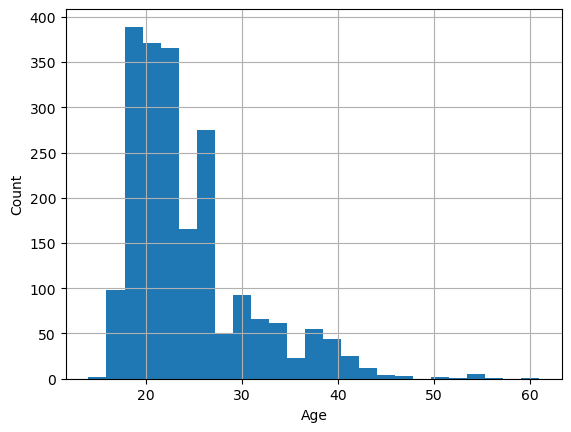

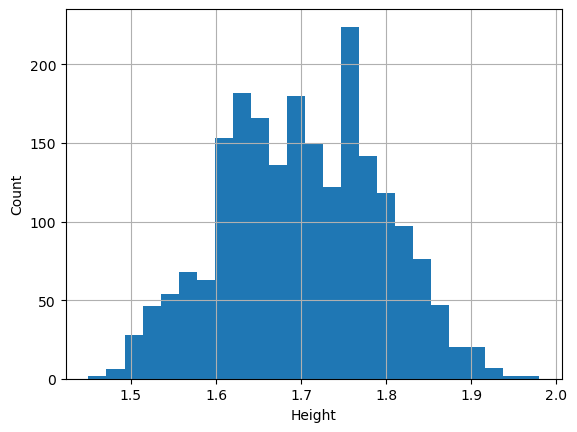

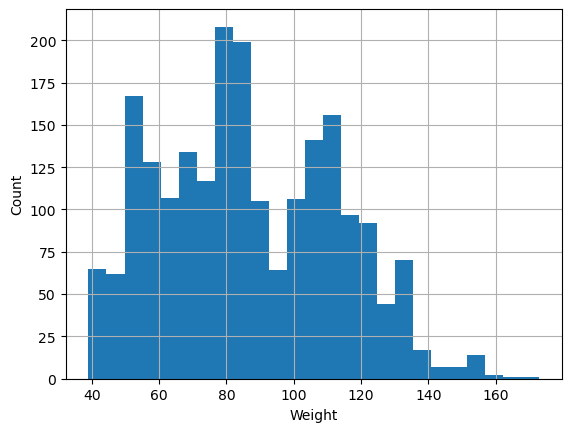

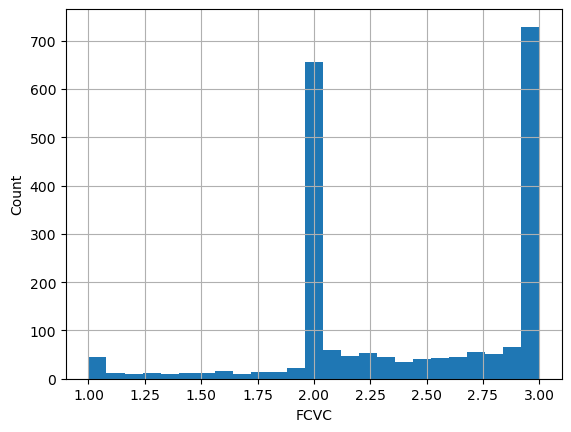

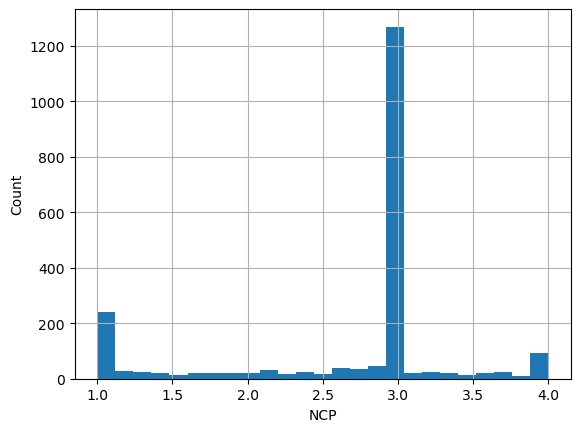

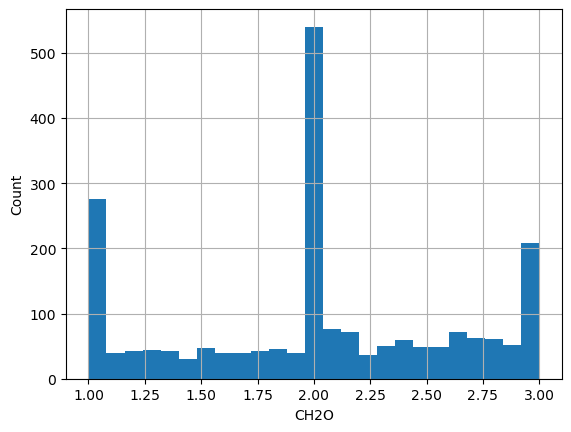

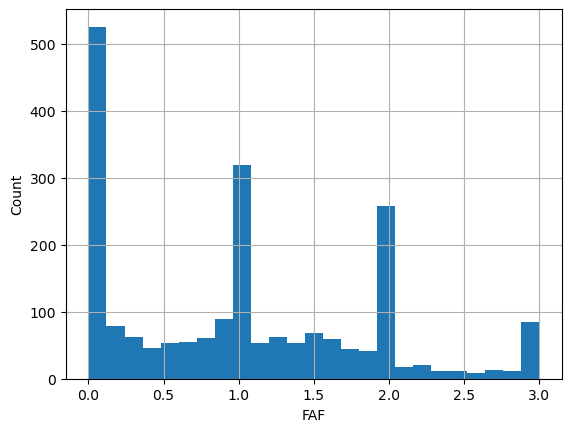

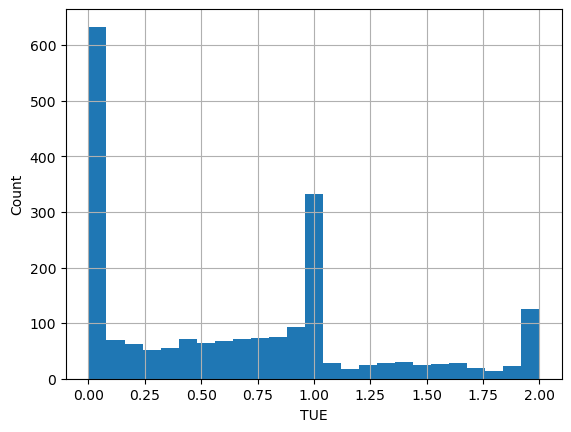

In [24]:
for feature in num_features:
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

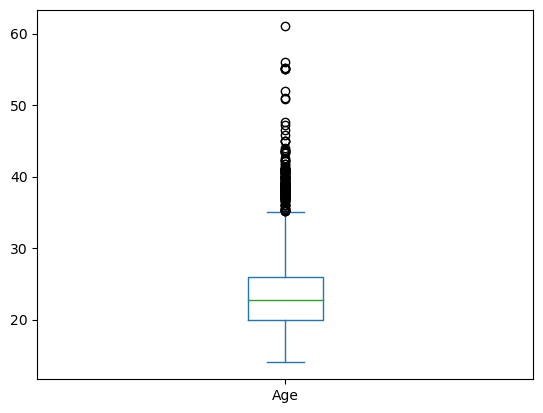

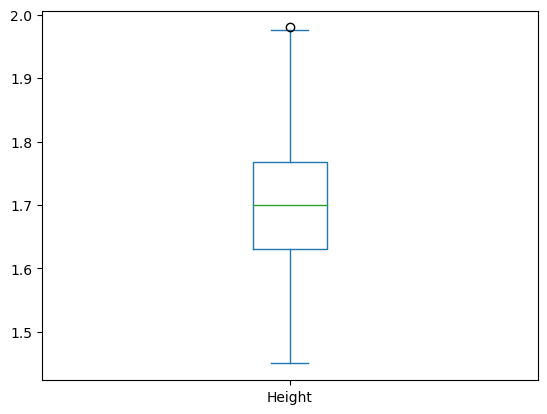

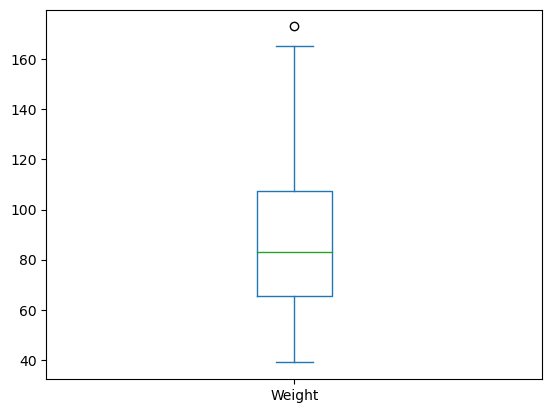

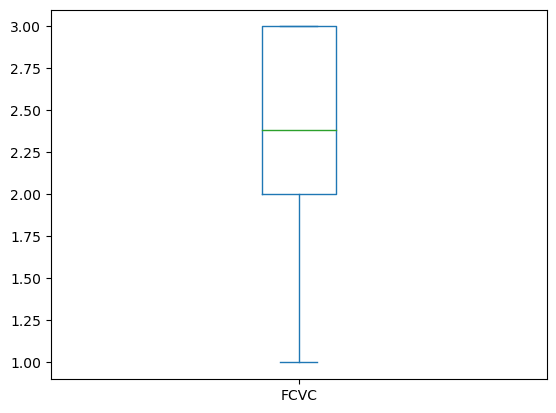

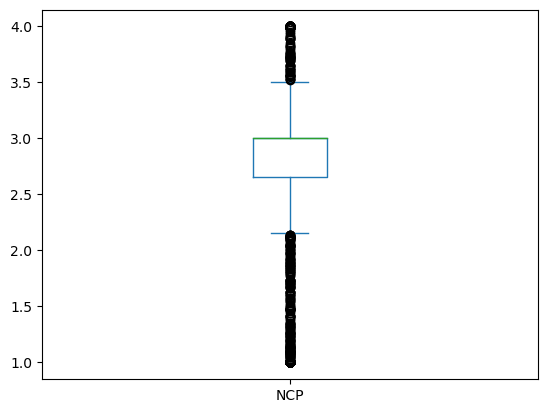

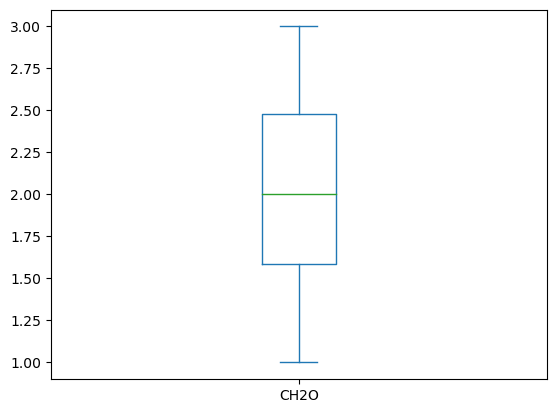

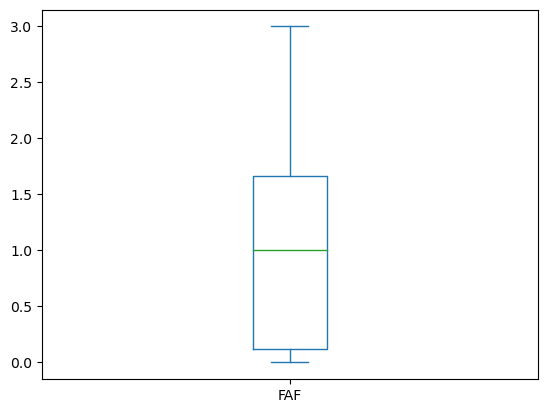

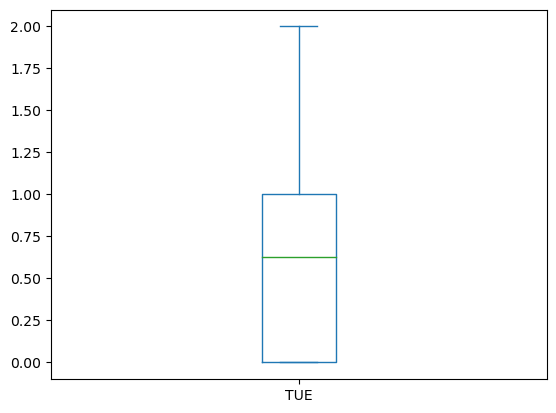

In [25]:
for feature in num_features:
    df[feature].plot(kind="box")
    # plt.xlabel(feature)
    # plt.ylabel("Count")
    plt.show()

We will apply log transformation to `Age` and `Weight`, and equal frequency discretization (or binning) to `FCVC`, `NCP`, `CH2O`, `FAF`, and `TUE`.

In [26]:
for feature in cat_features:
    print(f"{feature} has a cardinality of {df[feature].nunique()}\n")

Gender has a cardinality of 2

family_history_with_overweight has a cardinality of 2

FAVC has a cardinality of 2

CAEC has a cardinality of 4

SMOKE has a cardinality of 2

SCC has a cardinality of 2

CALC has a cardinality of 4

MTRANS has a cardinality of 5



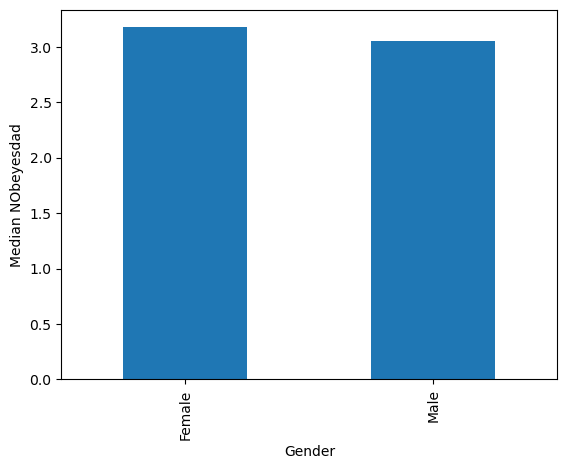

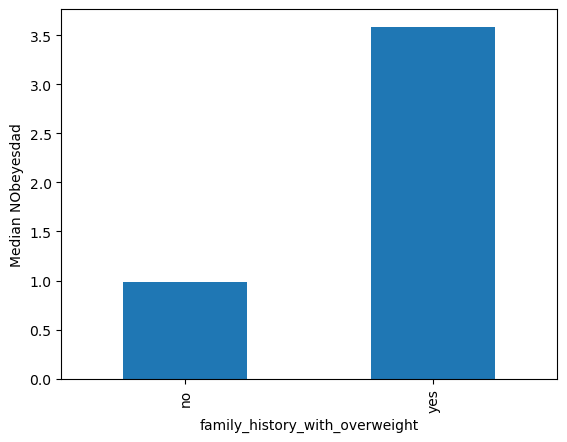

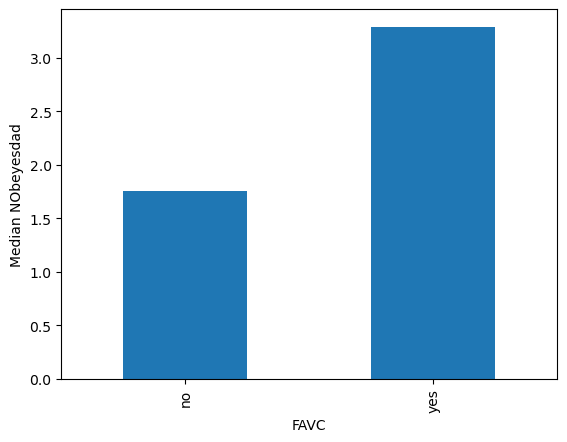

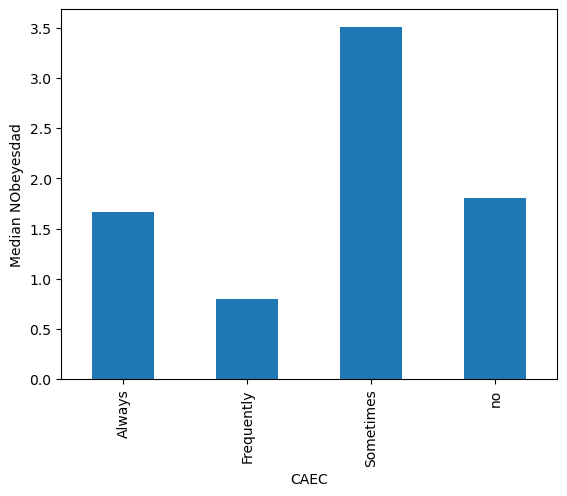

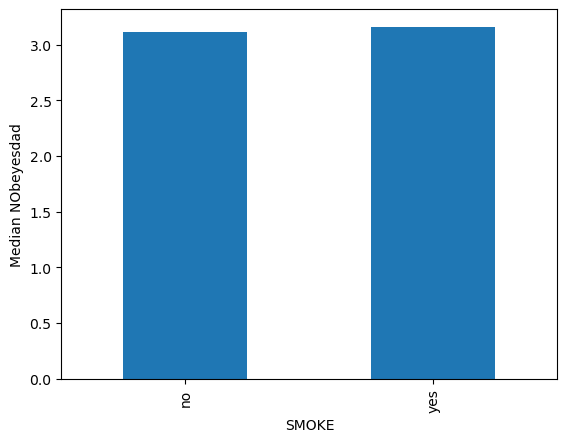

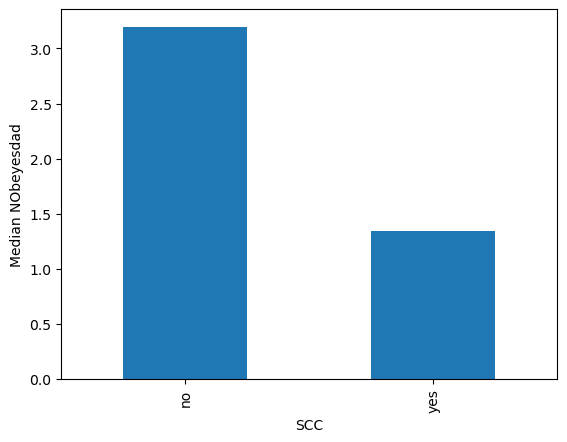

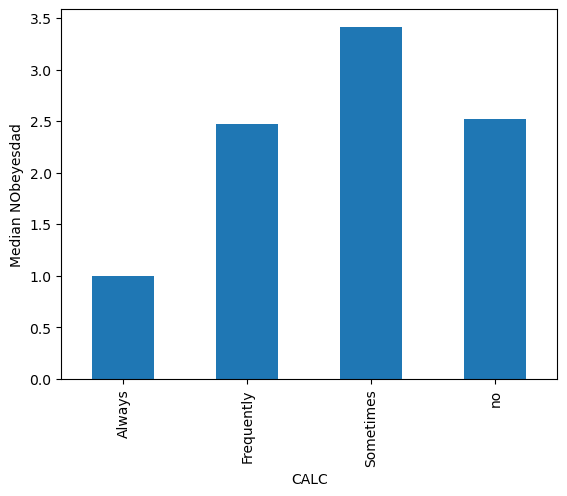

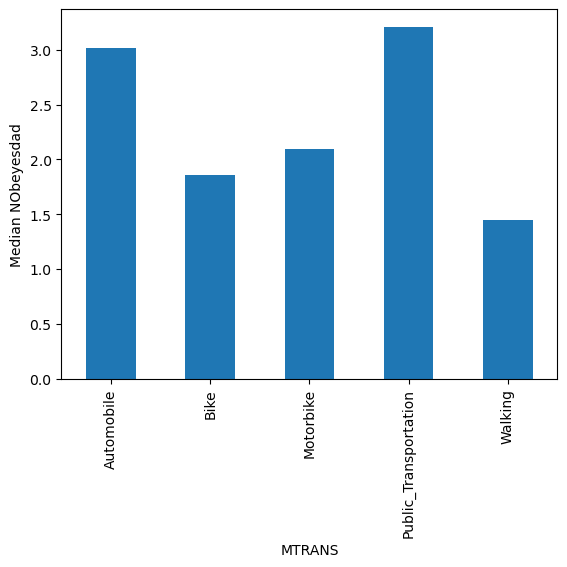

In [27]:
for feature in cat_features:
    df.groupby(feature)[target].mean().plot.bar()
    plt.ylabel(f"Median {target}")
    plt.show()

We will carry out monotonic ordinal encoding for a few of these categorical variables.

In [28]:
for feature in cat_features:
    print(df[feature].value_counts(normalize=True))
    print("\n")

Male      0.505921
Female    0.494079
Name: Gender, dtype: float64


yes    0.817622
no     0.182378
Name: family_history_with_overweight, dtype: float64


yes    0.883941
no     0.116059
Name: FAVC, dtype: float64


Sometimes     0.836097
Frequently    0.114638
Always        0.025107
no            0.024159
Name: CAEC, dtype: float64


no     0.979157
yes    0.020843
Name: SMOKE, dtype: float64


no     0.954524
yes    0.045476
Name: SCC, dtype: float64


Sometimes     0.663667
no            0.302700
Frequently    0.033160
Always        0.000474
Name: CALC, dtype: float64


Public_Transportation    0.748460
Automobile               0.216485
Walking                  0.026528
Motorbike                0.005211
Bike                     0.003316
Name: MTRANS, dtype: float64




Some categories have rare labels. We will handle them.

# Feature Engineering:

In [29]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1.0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1.0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1.0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,3.0


In [30]:
X = df.iloc[:, :-1]
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [31]:
y = df[[target]]
y.head()

,NObeyesdad
0,1.0
1,1.0
2,1.0
3,2.0
4,3.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [33]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1930,Female,25.982113,1.627818,105.428628,yes,yes,3.000000,3.0,Sometimes,no,1.480750,no,0.098043,0.663492,Sometimes,Public_Transportation
1803,Female,26.000000,1.656320,111.933010,yes,yes,3.000000,3.0,Sometimes,no,2.774014,no,0.000000,0.138418,Sometimes,Public_Transportation
1198,Male,18.000000,1.750097,86.372141,yes,yes,2.907062,3.0,Sometimes,no,2.740848,no,1.219827,0.037634,Sometimes,Public_Transportation
15,Female,22.000000,1.700000,66.000000,yes,no,3.000000,3.0,Always,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation
816,Male,23.451595,1.670227,75.000000,yes,yes,2.000000,3.0,Sometimes,no,2.000000,no,0.129163,1.983678,Sometimes,Public_Transportation


In [34]:
y_train.head()

,NObeyesdad
1930,6.0
1803,6.0
1198,3.0
15,1.0
816,2.0


In [35]:
for feature in cat_features:
    print(df[feature].unique())
    print("\n")

['Female' 'Male']


['yes' 'no']


['no' 'yes']


['Sometimes' 'Frequently' 'Always' 'no']


['no' 'yes']


['no' 'yes']


['no' 'Sometimes' 'Frequently' 'Always']


['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']




In [36]:
for feature in cat_features:
    print(X_train[feature].unique())
    print("\n")

['Female' 'Male']


['yes' 'no']


['yes' 'no']


['Sometimes' 'Always' 'Frequently' 'no']


['no' 'yes']


['no' 'yes']


['Sometimes' 'no' 'Frequently' 'Always']


['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']




# Building Pipelines:

In [37]:
# Categorical Encoding

ohe = OneHotEncoder(
    categories="auto",
    drop="first",
    sparse_output=False,
    handle_unknown="error"
) # will encode ["Gender", "SMOKE"]

oe_monotonic = OrdinalEncoder(
    encoding_method="ordered"
) # will encode ["family_history_with_overweight", "FAVC", "CAEC", "SCC", "CALC", "MTRANS"]

# Numerical Transformation and discretization

log_transformer = FunctionTransformer(
    func=np.log,
    inverse_func=np.exp
)

discretizer = KBinsDiscretizer(
    n_bins=3,
    encode="ordinal",
    strategy="quantile"
)

In [38]:
num_features

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [39]:
num_features + [
            "family_history_with_overweight",
            "FAVC",
            "CAEC",
            "SCC",
            "CALC",
            "MTRANS"
        ]

['Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CH2O',
 'FAF',
 'TUE',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SCC',
 'CALC',
 'MTRANS']

In [40]:
# Column transformers

cat_encoding = ColumnTransformer(
    [
        ("OHE", ohe, ["Gender", "SMOKE"]),
        ("OE", oe_monotonic, [
            "family_history_with_overweight",
            "FAVC",
            "CAEC",
            "SCC",
            "CALC",
            "MTRANS"
        ])
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

num_trans_disc = ColumnTransformer(
    [
        ("Log", log_transformer, ["Age", "Weight"]),
        ("Disc", discretizer, ["FCVC", "NCP", "CH2O", "FAF", "TUE"])
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

scaling = ColumnTransformer(
    [
        ("STD", StandardScaler(), num_features + [
            "family_history_with_overweight",
            "FAVC",
            "CAEC",
            "SCC",
            "CALC",
            "MTRANS"
        ])
    ],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

# $k$-Nearest Neighbours:

In [41]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Num_Trans_Dict", num_trans_disc),
        ("Scaling", scaling),
        ("K-NN", KNeighborsClassifier(
            n_neighbors=5
        ))
    ]
)

In [42]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'SMOKE']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('Num_Trans_Dict',
                 ColumnTransformer(remainder='passthroug...
                                                  ['FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('K-NN', KNeighborsClassifier())])

In [43]:
pred = pipeline.predict(X_test)

In [44]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[77,  7,  2,  0,  0,  0,  0],
       [16, 57,  9,  5,  6,  0,  0],
       [ 2, 19, 56,  8,  2,  1,  0],
       [ 2,  3,  7, 60,  7,  0,  0],
       [ 1,  2,  3, 14, 79,  3,  0],
       [ 0,  0,  0,  4,  1, 83,  0],
       [ 0,  0,  0,  0,  1,  0, 97]], dtype=int64)

In [45]:
accuracy_score(y_true=y_test, y_pred=pred)

0.8028391167192429

# XGBoost:

In [46]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Num_Trans_Dict", num_trans_disc),
        ("Scaling", scaling),
        ("XGBoost", XGBClassifier()),
    ]
)

In [47]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'SMOKE']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('Num_Trans_Dict',
                 ColumnTransformer(remainder='passthroug...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [48]:
pred = pipeline.predict(X_test)

In [49]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[83,  3,  0,  0,  0,  0,  0],
       [ 7, 76, 10,  0,  0,  0,  0],
       [ 0,  5, 83,  0,  0,  0,  0],
       [ 0,  0,  2, 77,  0,  0,  0],
       [ 0,  0,  3,  0, 96,  3,  0],
       [ 0,  0,  0,  0,  2, 86,  0],
       [ 0,  0,  0,  0,  1,  0, 97]], dtype=int64)

In [50]:
accuracy_score(y_true=y_test, y_pred=pred)

0.943217665615142

# Random Forest:

In [51]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Num_Trans_Dict", num_trans_disc),
        ("Scaling", scaling),
        ("Random_Forest", RandomForestClassifier()),
    ]
)

In [52]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'SMOKE']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('Num_Trans_Dict',
                 ColumnTransformer(remainder='passthroug...
                                                  ['FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('Random_Forest', RandomForestClassifier())])

In [53]:
pred = pipeline.predict(X_test)

In [54]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[82,  4,  0,  0,  0,  0,  0],
       [ 5, 80,  7,  1,  0,  0,  0],
       [ 0, 11, 75,  2,  0,  0,  0],
       [ 0,  2,  5, 72,  0,  0,  0],
       [ 0,  1,  2,  1, 95,  3,  0],
       [ 0,  0,  0,  0,  1, 87,  0],
       [ 0,  0,  0,  0,  1,  0, 97]], dtype=int64)

In [55]:
accuracy_score(y_true=y_test, y_pred=pred)

0.9274447949526814

# Gradient Boost:

In [56]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Num_Trans_Dict", num_trans_disc),
        ("Scaling", scaling),
        ("Gradient_Boost", GradientBoostingClassifier()),
    ]
)

In [57]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'SMOKE']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('Num_Trans_Dict',
                 ColumnTransformer(remainder='passthroug...
                                                  ['FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('Gradient_Boost', GradientBoostingClassifier())])

In [58]:
pred = pipeline.predict(X_test)

In [59]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[83,  3,  0,  0,  0,  0,  0],
       [ 5, 80,  8,  0,  0,  0,  0],
       [ 0,  3, 82,  3,  0,  0,  0],
       [ 0,  0,  1, 78,  0,  0,  0],
       [ 0,  0,  3,  1, 94,  4,  0],
       [ 0,  0,  0,  0,  1, 87,  0],
       [ 0,  0,  0,  0,  1,  0, 97]], dtype=int64)

In [60]:
accuracy_score(y_true=y_test, y_pred=pred)

0.9479495268138801

# Support Vector Machine:

In [61]:
pipeline = Pipeline(
    [
        ("Cat_Encoding", cat_encoding),
        ("Num_Trans_Dict", num_trans_disc),
        ("Scaling", scaling),
        ("Support_Vector_Machine", SVC()),
    ]
)

In [62]:
pipeline.fit(X_train, y_train)

c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\iNeuron\Placement_Assignment_Sushrut_Gaikwad\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('Cat_Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OHE',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'SMOKE']),
                                                 ('OE', OrdinalEncoder(),
                                                  ['family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('Num_Trans_Dict',
                 ColumnTransformer(remainder='passthroug...
                                                  ['FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])],
                                   verbose_feature_names_out=False)),
                ('Scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('STD', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'CAEC', 'SCC',
                                                   'CALC', 'MTRANS'])],
                                   verbose_feature_names_out=False)),
                ('Support_Vector_Machine', SVC())])

In [63]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)
cm

array([[83,  3,  0,  0,  0,  0,  0],
       [ 5, 80,  8,  0,  0,  0,  0],
       [ 0,  3, 82,  3,  0,  0,  0],
       [ 0,  0,  1, 78,  0,  0,  0],
       [ 0,  0,  3,  1, 94,  4,  0],
       [ 0,  0,  0,  0,  1, 87,  0],
       [ 0,  0,  0,  0,  1,  0, 97]], dtype=int64)

In [64]:
accuracy_score(y_true=y_test, y_pred=pred)

0.9479495268138801